In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

Ответим на следующие вопросы:

1. Как критики относятся к спортивным играм?

2. Критикам нравятся больше игры на PC или на PS4?

3. Критикам больше нравятся стрелялки или стратегии?

In [2]:
df = pd.read_csv('Video_Games_Sales.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# полностью исследуем датафрейм и поправим недочеты
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [6]:
# заменим tbd на nan
df['User_Score'] = df['User_Score'].replace('tbd', np.NaN)
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [7]:
# исправим типы данных
df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')
df['User_Count'] = df['User_Count'].astype('Int64')
df['User_Score'] = df['User_Score'].astype('float64')
df['Critic_Count'] = df['Critic_Count'].astype('Int64')

# # переводим оценки в один формат
df['User_Score'] = df['User_Score'] * 10

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  Int64  
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   Int64  
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   Int64  
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: Int64(3), float64(7), object(6)
memory usage: 2.1+ MB


In [9]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,80.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,<NA>,NaN,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,83.0,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,80.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,<NA>,NaN,<NA>,NaN,NaN


# 1. Как критики относятся к спортивным играм?

In [10]:
# сформируем датафрейм, содержащий только оценки критиков по спортивным играм
critic_sport = df.loc[:,['Genre', 'Critic_Score']]
critic_sport.head()

,Genre,Critic_Score
0,Sports,76.0
1,Platform,NaN
2,Racing,82.0
3,Sports,80.0
4,Role-Playing,NaN


In [11]:
# оставим оцентки только для спортивных игр
critic_sport = critic_sport[critic_sport['Genre'] == 'Sports']
critic_sport.head()

,Genre,Critic_Score
0,Sports,76.0
3,Sports,80.0
13,Sports,80.0
15,Sports,80.0
77,Sports,82.0


In [12]:
# оставим только оценки
critic_sport = critic_sport.loc[:,['Critic_Score']]
critic_sport

,Critic_Score
0,76.0
3,80.0
13,80.0
15,80.0
77,82.0
...,...
16680,NaN
16692,NaN
16697,NaN
16704,NaN


In [13]:
# сформируем аналогичный датафрейм, но содержащий только оценки пользователей по спортивным играм
user_sport = df.loc[:,['Genre', 'User_Score']]
user_sport.head()

,Genre,User_Score
0,Sports,80.0
1,Platform,NaN
2,Racing,83.0
3,Sports,80.0
4,Role-Playing,NaN


In [14]:
# оставим оценки только для спортивных игр
user_sport = user_sport[user_sport['Genre'] == 'Sports']
user_sport.head()

,Genre,User_Score
0,Sports,80.0
3,Sports,80.0
13,Sports,77.0
15,Sports,74.0
77,Sports,43.0


In [15]:
# оставим только оценки
user_sport = user_sport.loc[:,['User_Score']]
user_sport

,User_Score
0,80.0
3,80.0
13,77.0
15,74.0
77,43.0
...,...
16680,NaN
16692,NaN
16697,NaN
16704,NaN


Проверим равентво дисперсий выборок 

In [16]:
critic_sport.var()

Critic_Score    192.610889
dtype: float64

In [17]:
user_sport.var()

User_Score    259.651472
dtype: float64

Н0 - средние оценок критиков и пользователей не отличаются, выборки имеют равные средние

уровень значимости установим на уровне 0.05

In [18]:
# nan_policy='omit' - позволяет игнорировать пропуски и предварительно не удалять их специально
# т.к. дисперсии не равны, то используем критерий Уэлча equal_var = False(для разных дисперсий, True - для одинаковых)
t, p_value = st.ttest_ind(critic_sport, user_sport, nan_policy='omit', equal_var = False) 
t, p_value

print('Статистика =', t, 'p =', p_value)

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = [3.740857187853118] p = 0.0001881220558035444
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,80.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,<NA>,NaN,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,83.0,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,80.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,<NA>,NaN,<NA>,NaN,NaN


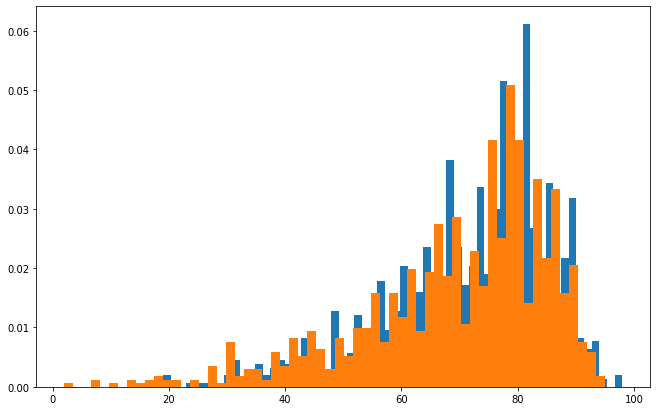

In [19]:
# визуализируем
# для этого сначала сформируем списки
critic_sport_list = list(df.loc[(df['Genre'] == 'Sports')]['Critic_Score'])
user_sport_list = list(df.loc[(df['Genre'] == 'Sports')]['User_Score'])

plt.hist(critic_sport_list, bins = 60, density = True);
plt.hist(user_sport_list, bins = 60, density = True);

Вывод: исходя из статистического теста, с вероятностью в 95% мы можем сказать,  что критики и пользователи оценивают игры по-разному. Можем посмотреть, какие в среднем оценки они выставляют, интуиция подсказывает, что критики более щедры на хорошие оценки

In [20]:
critic_sport.mean()
user_sport.mean()
print('средняя оценка критиков',critic_sport.mean(), 'средняя оценка игроков',user_sport.mean())

средняя оценка критиков Critic_Score    71.968174
dtype: float64 средняя оценка игроков User_Score    69.611967
dtype: float64


И действительно, средняя оценка критиков 71.96, игроков 69.61

#2. Критикам нравятся больше игры на PC или на PS4?



In [21]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,80.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,<NA>,NaN,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,83.0,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,80.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,<NA>,NaN,<NA>,NaN,NaN


In [22]:
# сформируем датафрейм, содержащий оценки критиков на РС
pc_score = df.loc[:,['Platform', 'Critic_Score']]
pc_score.head()

,Platform,Critic_Score
0,Wii,76.0
1,NES,NaN
2,Wii,82.0
3,Wii,80.0
4,GB,NaN


In [23]:
pc_score = pc_score[pc_score['Platform'] == 'PC']
pc_score

,Platform,Critic_Score
85,PC,86.0
138,PC,93.0
192,PC,88.0
195,PC,NaN
218,PC,93.0
...,...,...
16694,PC,NaN
16696,PC,80.0
16700,PC,61.0
16706,PC,60.0


In [24]:
pc_score = pc_score.loc[:,['Critic_Score']]
pc_score

,Critic_Score
85,86.0
138,93.0
192,88.0
195,NaN
218,93.0
...,...
16694,NaN
16696,80.0
16700,61.0
16706,60.0


In [25]:
ps4_score = df.loc[:,['Platform', 'Critic_Score']]
ps4_score = ps4_score[ps4_score['Platform'] == 'PS4']
ps4_score = ps4_score.loc[:,['Critic_Score']]
ps4_score

,Critic_Score
31,NaN
42,97.0
77,82.0
87,NaN
92,83.0
...,...
16504,69.0
16507,NaN
16530,61.0
16534,51.0


Проверим равентво дисперсий

In [29]:
pc_score.var()

Critic_Score    124.786222
dtype: float64

In [30]:
ps4_score.var()

Critic_Score    155.900003
dtype: float64

Н0 - средние оценок критиков не отличаются для PC и PS4, выборки имеют равные средние

уровень значимости установим на уровне 0.05

In [31]:
t, p_value = st.ttest_ind(pc_score, ps4_score, nan_policy='omit', equal_var = False) 
t, p_value

print('Статистика =', t, 'p =', p_value) 

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = [4.3087588262138725] p = 2.0672491572827482e-05
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [32]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,80.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,<NA>,NaN,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,83.0,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,80.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,<NA>,NaN,<NA>,NaN,NaN


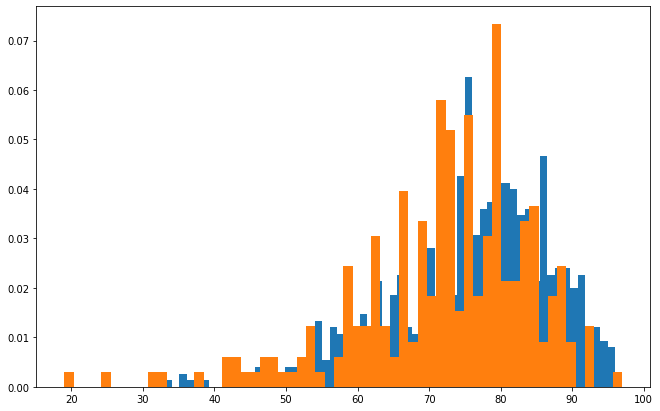

In [33]:
# визуализируем
# для этого сначала сформируем списки
pc_score_list = list(df.loc[(df['Platform'] == 'PC')]['Critic_Score'])
ps4_score_list = list(df.loc[(df['Platform'] == 'PS4')]['Critic_Score'])

plt.hist(pc_score_list, bins = 60, density = True);
plt.hist(ps4_score_list, bins = 60, density = True);

Вывод: исходя из статистического теста, с вероятностью в 95% мы можем сказать,  что критики оценивают игры на PC и PS4 по-разному. Можем посмотреть, какие в среднем оценки они выставляют

In [34]:
pc_score.mean()

Critic_Score    75.928671
dtype: float64

In [35]:
ps4_score.mean()

Critic_Score    72.09127
dtype: float64

Видим, что критики более высоко оценивают игры на PC - 75.92, чем на PS4 - 72.09

#3. Критикам больше нравятся стрелялки или стратегии?



In [36]:
shooter_critic = df.loc[:,['Genre', 'Critic_Score']]
shooter_critic = shooter_critic[shooter_critic['Genre'] == 'Shooter']
shooter_critic = shooter_critic.loc[:,['Critic_Score']]
shooter_critic

,Critic_Score
9,NaN
29,88.0
31,NaN
32,87.0
34,83.0
...,...
16580,NaN
16581,40.0
16606,NaN
16700,61.0


In [37]:
strategy_critic = df.loc[:,['Genre', 'Critic_Score']]
strategy_critic = strategy_critic[strategy_critic['Genre'] == 'Strategy']
strategy_critic = strategy_critic.loc[:,['Critic_Score']]
strategy_critic 

,Critic_Score
168,NaN
206,NaN
218,93.0
273,NaN
339,NaN
...,...
16621,NaN
16644,51.0
16682,NaN
16685,NaN


Проверим дисперсии

In [38]:
shooter_critic.var()

Critic_Score    211.777332
dtype: float64

In [39]:
strategy_critic.var()

Critic_Score    139.912829
dtype: float64

Н0 - средние оценок критиков не отличаются для стрелялок и стратегий, выборки имеют равные средние

уровень значимости установим на уровне 0.05

In [40]:
t, p_value = st.ttest_ind(shooter_critic, strategy_critic, nan_policy='omit', equal_var = False) 
t, p_value

print('Статистика =', t, 'p =', p_value) 

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = [-2.2972408230640315] p = 0.021938989522305212
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Вывод: исходя из статистического теста, с вероятностью в 95% мы можем сказать,  что критики оценивают стрелялки и стратегии по-разному. Можем посмотреть, какие в среднем оценки они выставляют

In [41]:
shooter_critic.mean()

Critic_Score    70.181144
dtype: float64

In [42]:
strategy_critic.mean()

Critic_Score    72.086093
dtype: float64

Видим, что критикам больше нравятся стратегии - 72.08 против 70.18 у стрелялок

Визуализируем с помощью боксплота

In [43]:
new = df.loc[:,['Genre', 'Critic_Score']]
new

,Genre,Critic_Score
0,Sports,76.0
1,Platform,NaN
2,Racing,82.0
3,Sports,80.0
4,Role-Playing,NaN
...,...,...
16714,Action,NaN
16715,Sports,NaN
16716,Adventure,NaN
16717,Platform,NaN


In [45]:
new = new[(new['Genre'] == 'Shooter') | (new['Genre'] == 'Strategy')]
new

,Genre,Critic_Score
9,Shooter,NaN
29,Shooter,88.0
31,Shooter,NaN
32,Shooter,87.0
34,Shooter,83.0
...,...,...
16682,Strategy,NaN
16685,Strategy,NaN
16700,Shooter,61.0
16706,Strategy,60.0


In [47]:
new = new.dropna(axis = 0, how ='any', inplace = False) 
new

,Genre,Critic_Score
29,Shooter,88.0
32,Shooter,87.0
34,Shooter,83.0
35,Shooter,83.0
36,Shooter,94.0
...,...,...
16573,Strategy,69.0
16581,Shooter,40.0
16644,Strategy,51.0
16700,Shooter,61.0


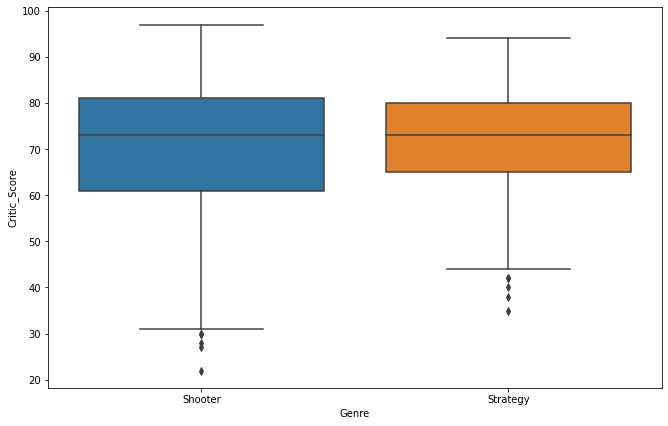

In [48]:
sns.boxplot(x = 'Genre', y = 'Critic_Score', data = new)